# Market Basket Analysis on Online Retail Data

## Customer Segmentation using RFM Analysis

### 1. Overview:
- Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
- It works by looking for combinations of items that occur together frequently in transactions.
- To put it another way, it allows retailers to identify relationships between the items that people buy.
- Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

# Runtime Configuration Parameters for Matplotlib
plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

### 1. What is RFM Analysis?
- It is a customer segmentation technique that uses past purchase behavior to segment customers, so that you can market to those customers more effectively
- To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value
    1. Recency (R): Time since last purchase
    2. Frequency (F): Total number of purchases
    3. Monetary Value (M): Total monetary value
- RFM analysis enables marketers to increase revenue by targeting specific groups of existing customers (i.e., customer segmentation) with messages and offers that are more likely to be relevant based on data about a particular set of behaviors

In [2]:
# Read data
retail = pd.read_csv('CleanRetailData.csv')

/var/folders/rn/h7x_h16n7n1gnzc3lxtb6yzh0000gn/T/ipykernel_36060/2560122430.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  retail = pd.read_csv('CleanRetailData.csv')


In [3]:
# Function that filters the data frame based on country name
def choose_country(country = "all", data = retail):
    if country == "all":
        return data
    else:
        temp_df = data[data["Country"] == country]
        temp_df.reset_index(drop= True, inplace= True)
        return temp_df

### 2. United Kingdom data
Most of the transaction come from UK and so, we limit the data that we will use to only the transaction that come from UK.

In [4]:
rfm = choose_country(country="United Kingdom")
rfm.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Time of Day,Month,Week of the Year,Day of Week,Sales Revenue
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,19.5
1,1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
2,2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
3,3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
4,4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,12.5


In [5]:
x = choose_country(country="EIRE")
x

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Time of Day,Month,Week of the Year,Day of Week,Sales Revenue
0,7373,540547,72780,BLACK SILOUETTE CANDLE PLATE,12,2011-01-09 16:07:00,0.85,14911,EIRE,2011-01-09,16:07:00,16,Afternoon,January,1,Sunday,10.2
1,7374,540547,21617,4 LILY BOTANICAL DINNER CANDLES,6,2011-01-09 16:07:00,3.75,14911,EIRE,2011-01-09,16:07:00,16,Afternoon,January,1,Sunday,22.5
2,7375,540547,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,6,2011-01-09 16:07:00,2.55,14911,EIRE,2011-01-09,16:07:00,16,Afternoon,January,1,Sunday,15.3
3,7376,540547,22102,MIRROR MOSAIC T-LIGHT HOLDER,6,2011-01-09 16:07:00,1.65,14911,EIRE,2011-01-09,16:07:00,16,Afternoon,January,1,Sunday,9.9
4,7377,540547,18098C,PORCELAIN BUTTERFLY OIL BURNER,6,2011-01-09 16:07:00,2.95,14911,EIRE,2011-01-09,16:07:00,16,Afternoon,January,1,Sunday,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,479250,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911,EIRE,2011-12-08,15:54:00,15,Afternoon,December,49,Thursday,17.0
7398,479251,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911,EIRE,2011-12-08,15:54:00,15,Afternoon,December,49,Thursday,16.5
7399,479252,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911,EIRE,2011-12-08,15:54:00,15,Afternoon,December,49,Thursday,16.5
7400,479253,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911,EIRE,2011-12-08,15:54:00,15,Afternoon,December,49,Thursday,16.5


In [6]:
# We need a reference day to perform the RFM Analysis
# In this case the day after the last recorded date in the dataset plus a day
rfm['InvoiceDate'] = pd.to_datetime(rfm['InvoiceDate'])
ref_date = rfm['InvoiceDate'].max() + dt.timedelta(days=1)
ref_date

/var/folders/rn/h7x_h16n7n1gnzc3lxtb6yzh0000gn/T/ipykernel_36060/2233835696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['InvoiceDate'] = pd.to_datetime(rfm['InvoiceDate'])


Timestamp('2011-12-10 12:49:00')

In [7]:
# Remove 'Guest Customer' 
rfm = rfm[rfm['CustomerID'] != "Guest Customer"]

In [8]:
# Aggregating over CustomerID
rfm_new = rfm.groupby('CustomerID').agg({'InvoiceDate': lambda x: (ref_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'Sales Revenue': lambda x: x.sum()})
# Calculate quantiles
rfm_new.columns = ['Recency', 'Frequency', 'Monetary']
rfm_new["R"] = pd.qcut(rfm_new['Recency'].rank(method="first"), 4, labels=[4, 3, 2, 1])
rfm_new["F"] = pd.qcut(rfm_new['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm_new["M"] = pd.qcut(rfm_new['Monetary'].rank(method="first"), 4, labels=[1, 2, 3, 4])
# Calculate RFM Score
rfm_new['RFM_Score'] = (rfm_new['R'].astype(int) + rfm_new['F'].astype(int) + rfm_new['M'].astype(int))

# RFM Dataframe
rfm_new.reset_index(inplace=True)
rfm_new.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346,326,1,77183.60,1,1,4,6
1,12747,2,9,3489.74,4,4,4,12
2,12748,1,171,27508.01,4,4,4,12
3,12749,4,5,4040.88,4,4,4,12
4,12820,3,4,942.34,4,3,3,10
5,12821,214,1,92.72,1,1,1,3
6,12822,71,2,948.88,2,2,3,7
7,12823,75,5,1759.50,2,4,4,10
8,12824,60,1,397.12,2,1,2,5
9,12826,3,6,1319.72,4,4,3,11


In [9]:
# Aggregation on RFM Score on the dataset
rfm_new[["RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("RFM_Score").agg(["mean", "max", "min"])

Recency            Frequency              Monetary              \
                 mean  max  min       mean  max min         mean         max   
RFM_Score                                                                      
3          239.799228  340  129   1.000000    1   1   156.555946     290.360   
4          189.821670  336   49   1.076749    2   1   245.367878     626.650   
5          121.619910  338   18   1.280543    4   1   343.939844    1384.250   
6           83.008969  326    1   1.553812    5   1   633.752982   77183.600   
7           74.256614  333    1   2.113757    6   1   647.219714    3251.071   
8           57.058496  235    1   2.740947    8   1  1097.447994   44534.300   
9           39.449086  276    1   3.425587   10   1  1194.476661    6617.650   
10          34.008824  127    1   5.023529   36   2  2317.973000  168472.500   
11          20.232143   47    1   7.282738   56   3  3037.044613   59595.570   
12           6.848341   17    1  14.353081  171   4  7749.161280  231822.690   

                    
               min  
RFM_Score           
3            19.80  
4             3.75  
5            13.30  
6            15.00  
7            20.35  
8           102.45  
9           201.12  
10          306.72  
11          664.34  
12         1539.49

### 3. K-means clustering on CustomerID using RFM dataframe to enable customer grouping

In [10]:
# Scaling Recency, Frequency, Monetary and RFM_Score columns
scaler = StandardScaler()
# Subset
rfm_scaled = rfm_new[['Recency','Frequency','Monetary','RFM_Score']]
rfm_scaled = scaler.fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled, columns = ['Recency','Frequency','Monetary','RFM_Score'])
rfm_scaled.head()

,Recency,Frequency,Monetary,RFM_Score
0,2.694897,-0.461169,10.613475,-0.532027
1,-0.921065,0.761126,0.241360,1.596080
2,-0.932226,25.512592,3.621835,1.596080
3,-0.898745,0.149978,0.318930,1.596080
4,-0.909905,-0.002809,-0.117177,0.886711


#### 3.1 Optimum clusters evaluation using Elbow Method

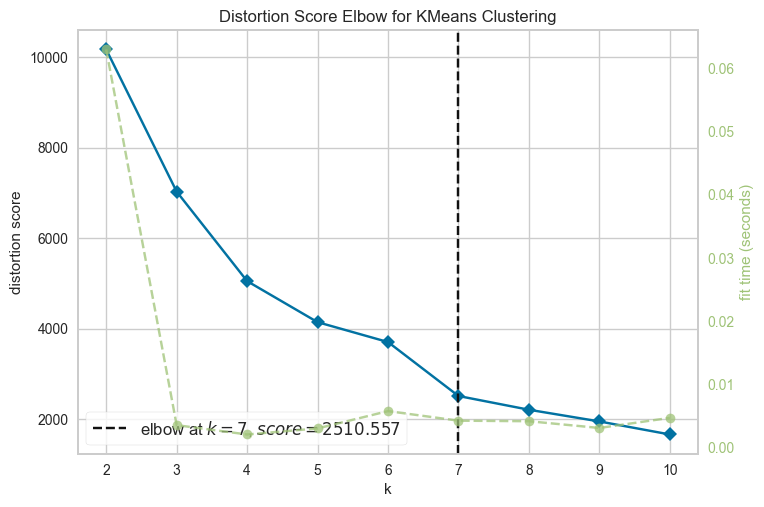

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# The k values to compute silhouette scores for
# If a single integer is specified, then will compute the range (2,k)
elbow_method = KElbowVisualizer(KMeans(), k = 10, colors = 'viridis') # range = [2, 10]
elbow_method.fit(rfm_scaled)
elbow_method.show()

In [12]:
# Fit Kmeans at n_clusters = 5
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=50,verbose=0)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4, n_init=10)

In [13]:
# Assigning Clusters
rfm_new['Clusters'] = kmeans.labels_
rfm_new.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Clusters
0,12346,326,1,77183.60,1,1,4,6,2
1,12747,2,9,3489.74,4,4,4,12,3
2,12748,1,171,27508.01,4,4,4,12,2
3,12749,4,5,4040.88,4,4,4,12,3
4,12820,3,4,942.34,4,3,3,10,3


Text(0, 0.5, 'Monetary')

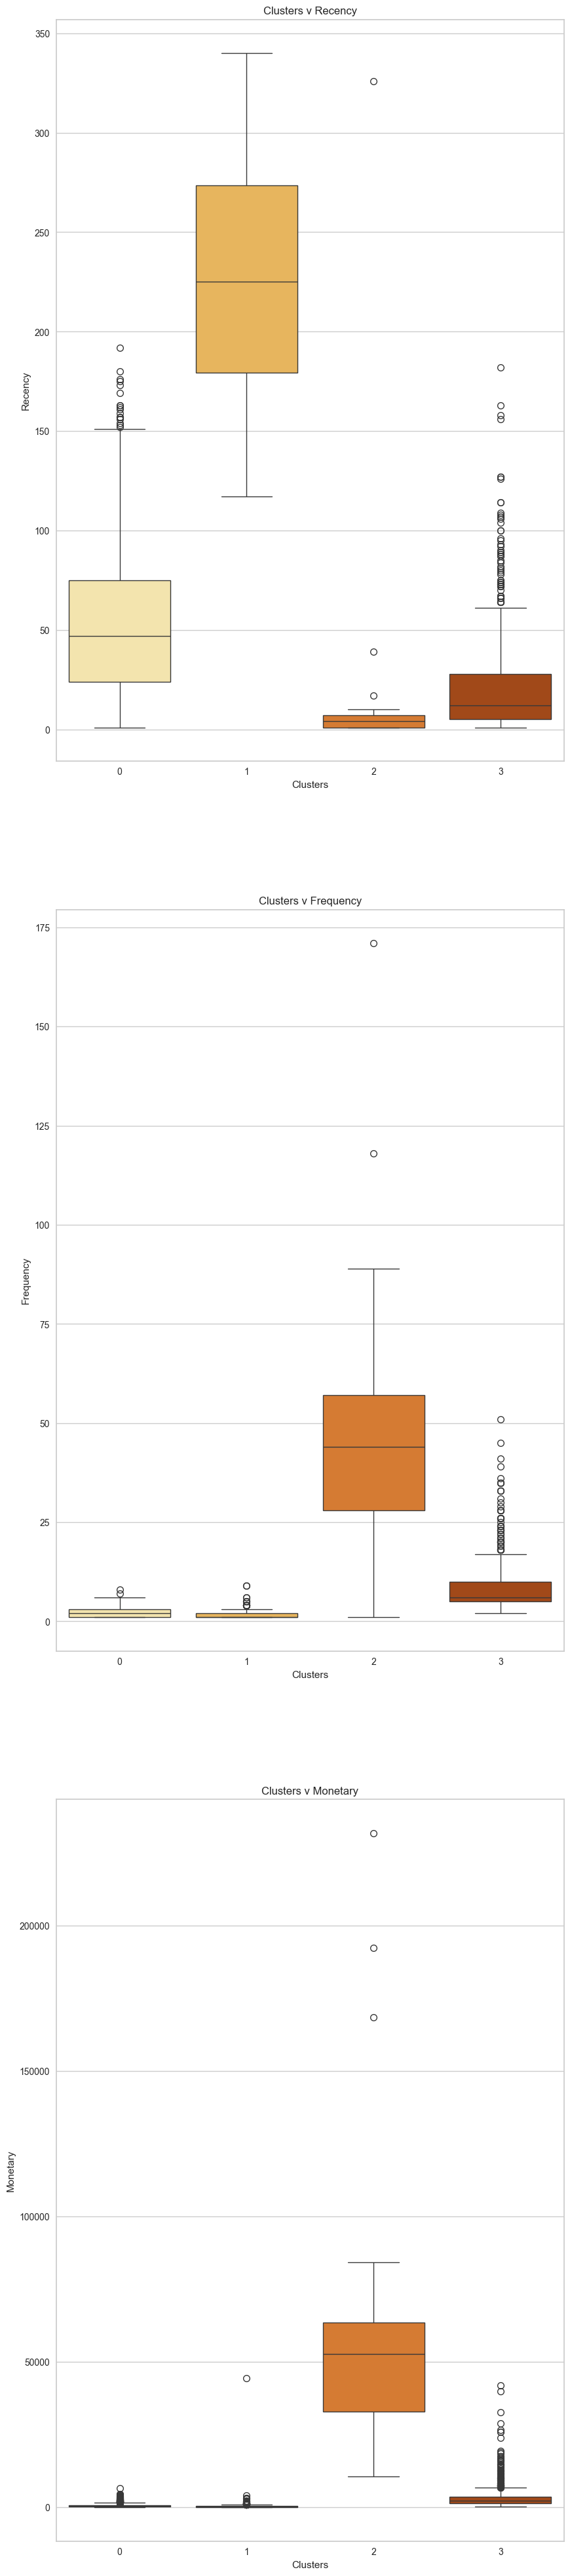

In [14]:
# Plot
fig, ax = plt.subplots(3, 1, figsize = (10, 50))

# Recency
sns.boxplot(data = rfm_new, x = "Clusters", y = "Recency" , palette = 'YlOrBr', ax = ax[0])
ax[0].set_title('Clusters v Recency')
ax[0].set_ylabel('Recency')

# Frequency
sns.boxplot(data = rfm_new, x = "Clusters", y = "Frequency" , palette = 'YlOrBr', ax = ax[1])
ax[1].set_title('Clusters v Frequency')
ax[1].set_ylabel('Frequency')

# Monetary
sns.boxplot(data = rfm_new, x = "Clusters", y = "Monetary" , palette = 'YlOrBr', ax = ax[2])
ax[2].set_title('Clusters v Monetary')
ax[2].set_ylabel('Monetary')

In [15]:
rfm_stats = rfm_new[["Clusters","RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("Clusters").agg(["mean"])
rfm_stats.columns = ["RFM_Score_Mean", "Recency_Mean", "Frequency_Mean", "Monetary_Mean"]
rfm_stats

,RFM_Score_Mean,Recency_Mean,Frequency_Mean,Monetary_Mean
Clusters,,,,
0,6.908033,53.230471,2.074238,643.009265
1,4.274972,227.977553,1.404040,429.106612
2,11.640000,18.280000,51.680000,64156.946400
3,11.031279,20.445262,8.293468,3322.771978


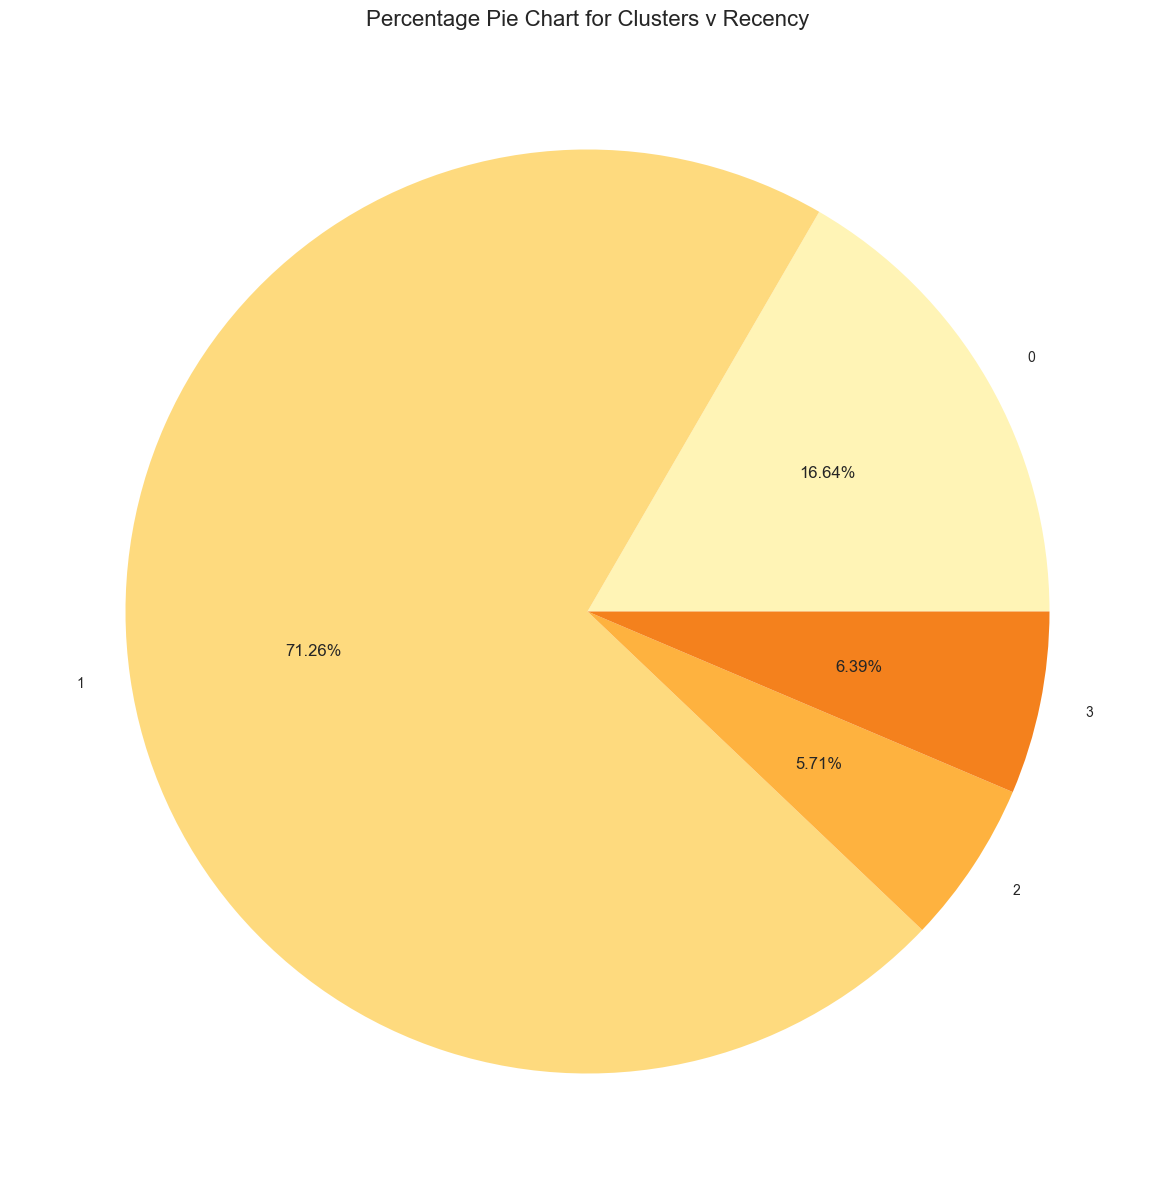

In [16]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per day of week
plt.pie(rfm_stats['Recency_Mean'], labels = rfm_stats.index , colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Clusters v Recency', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

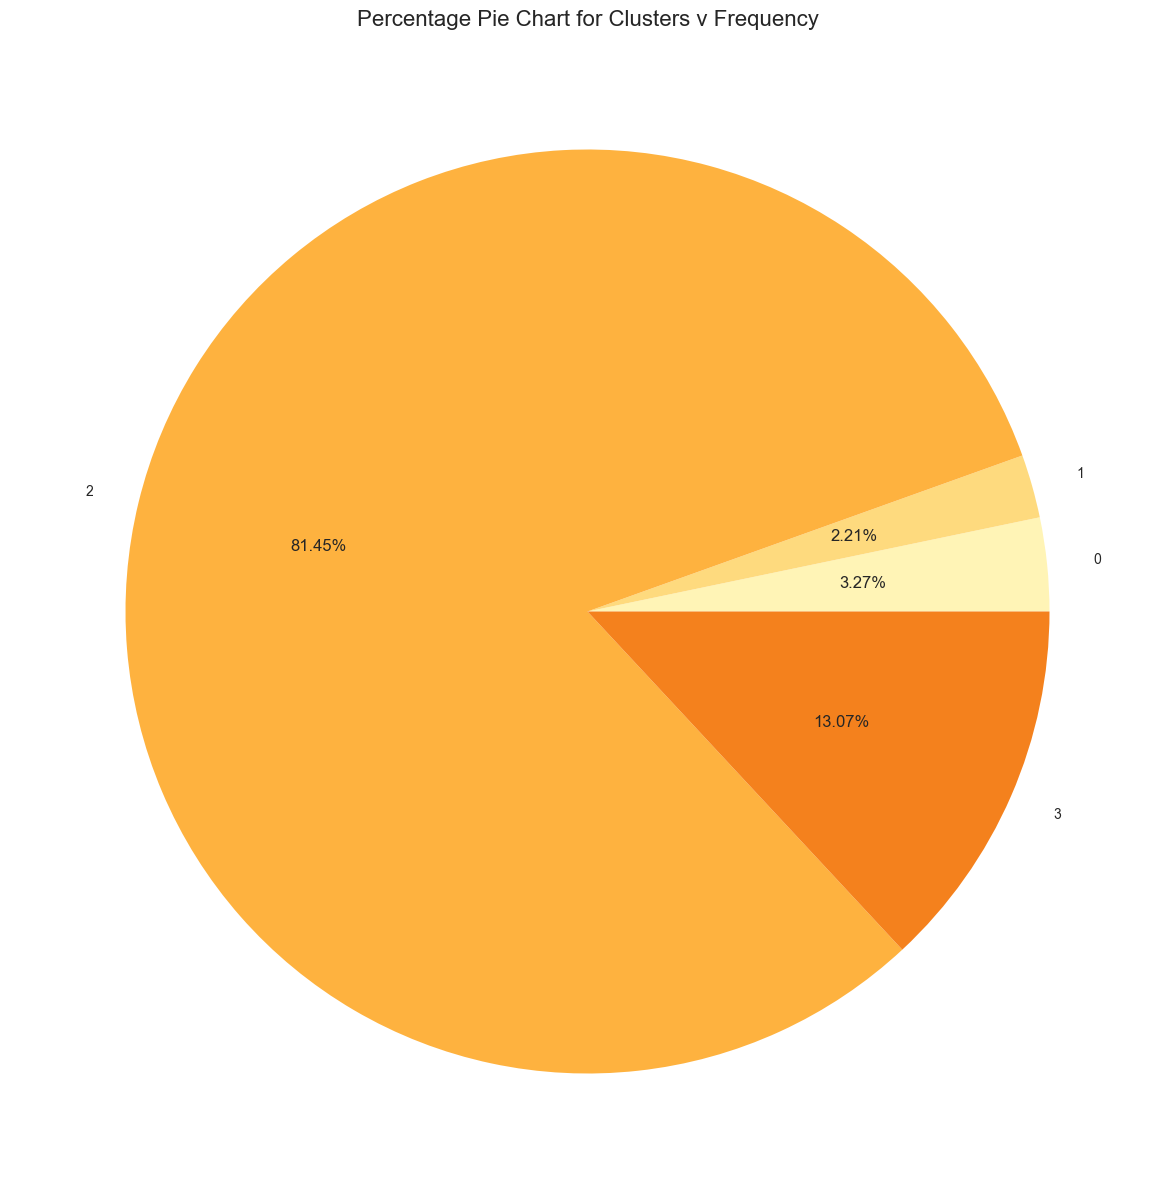

In [17]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per day of week
plt.pie(rfm_stats['Frequency_Mean'], labels = rfm_stats.index , colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Clusters v Frequency', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

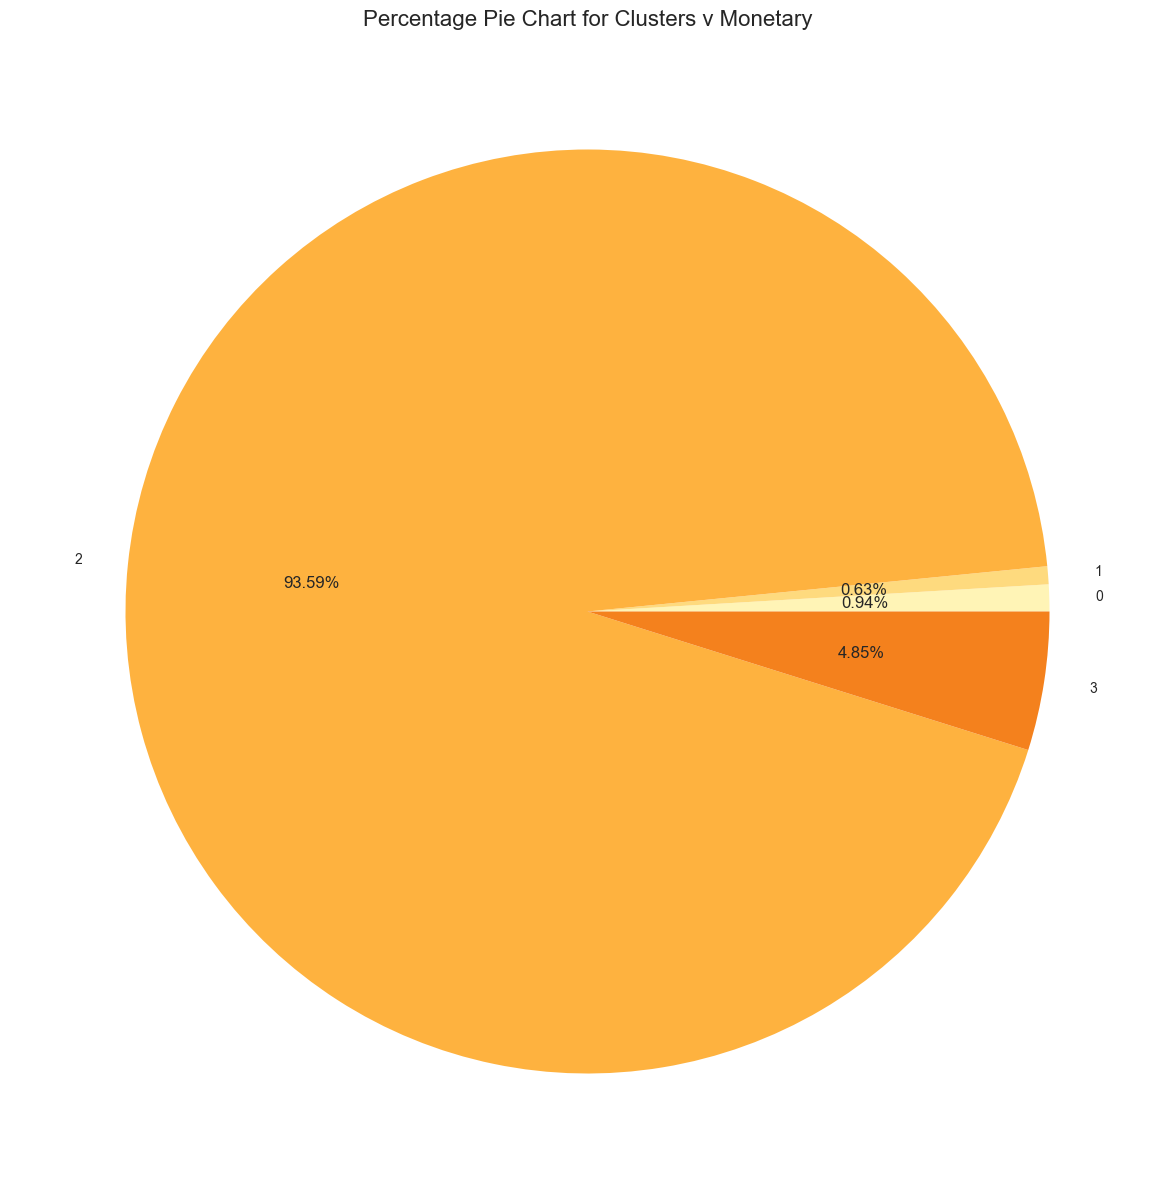

In [18]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per day of week
plt.pie(rfm_stats['Monetary_Mean'], labels = rfm_stats.index , colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Clusters v Monetary', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

**Observation:**
- The above pie charts show the percent representation by each cluster concerning the RFM metrics

**1. Cluster 0:**
- Highest average recency
- Low average frequency
- Very low average monetary value 
- Very poor metrics overall
- These might be new customers, management targets promotions for this group to entice them to purchase more and frequently

**2. Cluster 1:**
- Moderate average recency
- Very low average frequency
- Very low average monetary value
- Better than 0 and 2 clusters in terms of average monetary value
- Recently bought items, but very low spenders

**3. Cluster 2:**
- Low average recency among the 5 clusters with 1.14%
- High average frequency 
- High average monetary value 
- Last order very old, but if they buy then they spend a large amount

**4. Cluster 3:** 
- High average recency
- Low average frequency
- Very low average monetary value 
- Are probably the customers that the store has had for a long period, but starting to lose interest in the store, these customers can be a prime candidates for targeted promotions to entice them to purchase more and frequently